In [40]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt 

Первый шаг – загрузить данные и убедиться, что всё считалось правильно: посмотреть на столбцы, типы данных, размерность, наличие пропущенных значений.

В каком столбце встретилось больше всего пропущенных значений? В качестве ответа укажите их число, после чего удалите строки с пропущенными значениями из датасета.

In [2]:
df = pd.read_csv('C:/Users/askha/Downloads/games.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [4]:
df.shape

(16598, 11)

In [5]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

Выведите описательные характеристики переменной Year и постройте график распределения количества выпущенных игр по годам.

In [8]:
df.Year.describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [26]:
stats.mode(df.Year)

ModeResult(mode=array([2009.]), count=array([1431]))

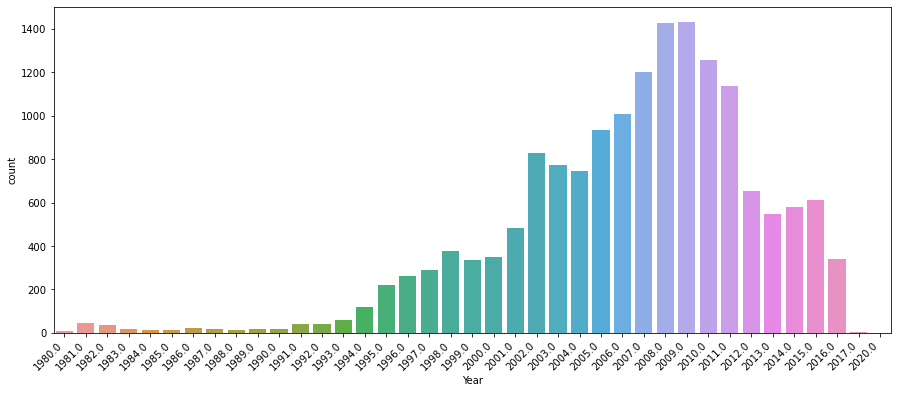

In [43]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.countplot(data=df, x='Year', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [47]:
df.Year.count()

16291

In [53]:
round(df.query('Year > 2007').shape[0] / 16291 * 100)

49

Примерно половина игр была выпущена после 2007 года


На каких платформах произошло больше всего релизов?

Оставьте названия только тех платформ, частота встречаемости которых составляет более 7%. Значения укажите в порядке убывания частоты встречаемости через запятую с пробелом.

In [95]:
df1 = (df.Platform.value_counts() / 16291 * 100) \
    .to_frame()

df_top_7 = df1.query(' Platform > 7') \
    .reset_index() \
    .rename(columns={'index': "platform", 'Platform': "ratio"})

df_top_7.platform.values

array(['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS'], dtype=object)

Игры каких издателей (Publisher) встречаются в датасете чаще всего?

В качестве ответа укажите наибольшую абсолютную частоту встречаемости.

In [103]:
df.Publisher.value_counts()

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Detn8 Games                        1
Pow                                1
Navarre Corp                       1
MediaQuest                         1
UIG Entertainment                  1
Name: Publisher, Length: 576, dtype: int64

Сфокусируемся на играх от Nintendo. Посчитайте среднее, медиану и стандартное отклонение по продажам игр данного издателя в разных регионах (NA, EU, JP, Other). 

В каком регионе медианное значение объема продаж является наибольшим?

In [108]:
df_nintendo = df.query('Publisher == "Nintendo"')
df_nintendo

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16269,16272,Slide Adventure: Mag Kid,DS,2007.0,Action,Nintendo,0.00,0.00,0.01,0.00,0.01
16357,16360,Mario vs. Donkey Kong: Tipping Stars,WiiU,2015.0,Puzzle,Nintendo,0.00,0.00,0.01,0.00,0.01
16456,16459,Art Academy: Home Studio,WiiU,2015.0,Misc,Nintendo,0.00,0.00,0.01,0.00,0.01
16473,16476,Captain Rainbow,Wii,2008.0,Adventure,Nintendo,0.00,0.00,0.01,0.00,0.01


In [112]:
df_nintendo.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,696.000000,696.00000,696.000000,696.000000,696.000000,696.000000,696.000000
mean,3801.864943,2003.83046,1.172055,0.601006,0.653721,0.136767,2.563836
std,3969.268372,7.77637,2.989913,1.743953,1.063110,0.464170,5.676925
min,1.000000,1983.00000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,710.750000,2000.00000,0.010000,0.007500,0.090000,0.000000,0.300000
50%,2262.000000,2005.00000,0.375000,0.120000,0.280000,0.030000,0.920000
75%,5901.750000,2009.00000,0.972500,0.482500,0.740000,0.090000,2.262500
max,16545.000000,2016.00000,41.490000,29.020000,10.220000,8.460000,82.740000


Теперь посмотрим на продажи Nintendo в Японии по жанрам. Постройте боксплот, где:

по оси x будет расположен жанр игры (Genre)
по оси у – объем продаж в Японии (JP_sales)
Взглянем на получившиеся боксплоты. Что мы можем по ним сказать о данных?

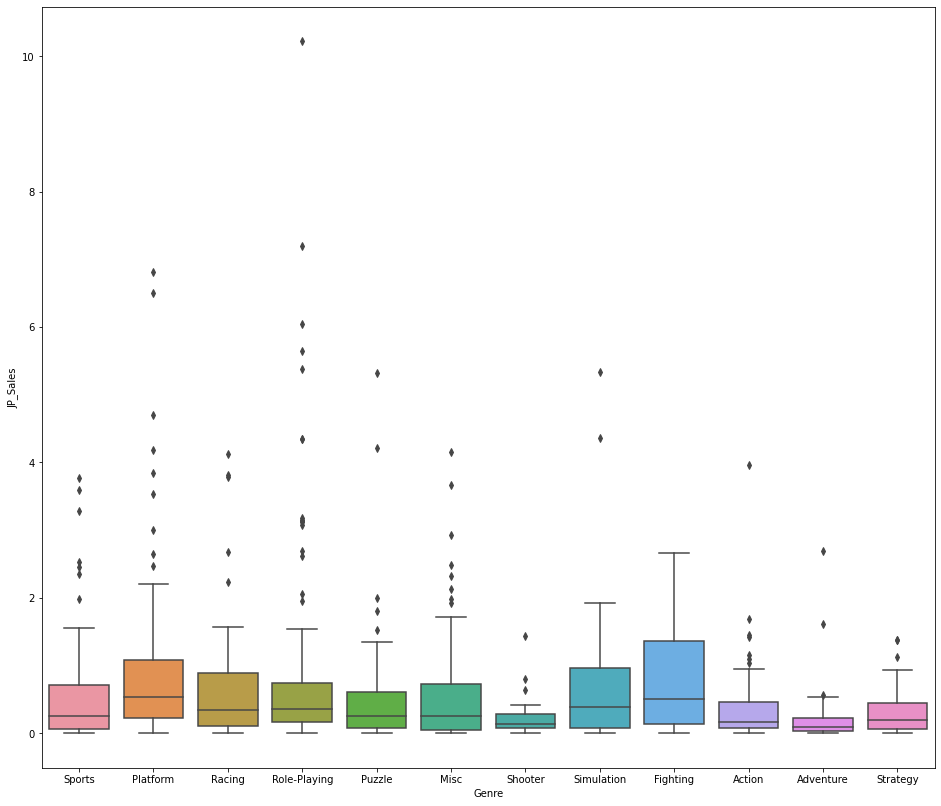

In [131]:
fig, ax = plt.subplots(figsize=(16, 14))
sns.boxplot(data=df_nintendo, x='Genre', y='JP_Sales', ax=ax)
plt.show()

Среднее значение продаж игр жанра Fighting выше, чем у игр Simulation?

In [144]:
df_nintendo.groupby('Genre') \
    .agg({'JP_Sales' : 'mean'}) \
    .sort_values('JP_Sales', ascending=False )

,JP_Sales
Genre,
Role-Playing,0.970952
Platform,0.922162
Simulation,0.844643
Fighting,0.830000
Racing,0.789730
Sports,0.652182
Misc,0.552500
Puzzle,0.501216
Action,0.373846


Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports.

На каком отрезке времени игры жанра Sports были наиболее популярны? Иными словами, выберите наименьший отрезок, который включает в себя несколько крупных пиков.

In [152]:
df_sorted = df.query("Genre in ('Fighting', 'Simulation', 'Platform', 'Racing', 'Sports') and Publisher == 'Nintendo'") \
    .groupby(['Genre', 'Year'], as_index=False) \
    .agg({'Global_Sales' : 'sum'})

df_sorted

,Genre,Year,Global_Sales
0,Fighting,1987.0,5.42
1,Fighting,1993.0,2.00
2,Fighting,1995.0,3.20
3,Fighting,1996.0,0.99
4,Fighting,1999.0,5.55
...,...,...,...
109,Sports,2010.0,2.18
110,Sports,2012.0,1.05
111,Sports,2013.0,1.69
112,Sports,2014.0,0.88


<AxesSubplot:xlabel='Year', ylabel='Global_Sales'>

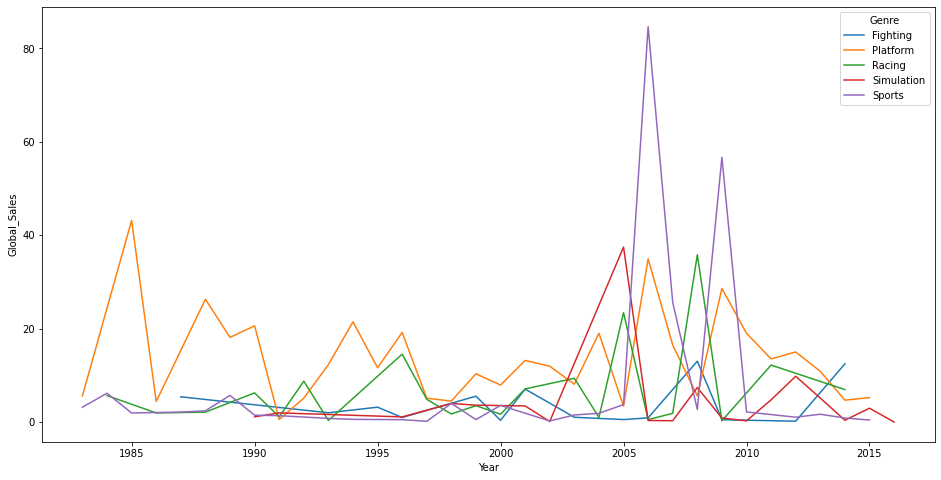

In [159]:
fig = plt.subplots(figsize=(16, 8))
sns.lineplot(x = 'Year', y = 'Global_Sales', hue = 'Genre', data = df_sorted)

по графику видно что игры жанра Sports были наиболее популярны с 2005 по 2010 год.